## Mini Project III

# Customer Demographics

In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from numpy import linalg as LA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

In [2]:
cust_df = pd.read_csv("C:\\Users\\emily\\OneDrive\\Desktop\\Data Science Bootcamp\\wk5\\LHL Project 4 - Clustering\\Data\\twm_customer.csv")

In [3]:
cust_df.shape

(747, 15)

In [4]:
cust_df.columns

Index(['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status', 'name_prefix', 'first_name', 'last_name',
       'street_nbr', 'street_name', 'postal_code', 'city_name', 'state_code'],
      dtype='object')

In [5]:
# check for duplicate customer IDs
difference = ( (cust_df["cust_id"].unique() .sum() ) -  (cust_df["cust_id"] .sum() ) )
print(difference)

0


In [6]:
# no duplicate IDs.
#drop irrelevant columns

cust_df = cust_df.drop ( columns = ["cust_id", "street_nbr", "street_name", "postal_code", "city_name","first_name", "last_name", "name_prefix" ])

In [7]:
# check remaining columns for null data
print (cust_df.isna() .sum() )

income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
state_code         0
dtype: int64


In [8]:
# check how many zeros
print ((cust_df == 0).sum() )

income             102
age                  0
years_with_bank     88
nbr_children       466
gender               0
marital_status       0
state_code           0
dtype: int64


In [9]:
# check how many people under the age of 18 with no income
kids = ( (cust_df["age"] <=18 )  &  (cust_df["income"] == 0) ) .sum()
kids

102

In [10]:
# drop people under 18 with no income
# (since you want to keep df where age > 18 OR income != 0, use OR (|) rather than AND (&) )

to_keep = (cust_df["age"] > 18 )  |  (cust_df["income"] != 0)
cust_df = cust_df[to_keep]

In [11]:
#recheck zeros
print ( (cust_df ==0) .sum() )

income               0
age                  0
years_with_bank     76
nbr_children       364
gender               0
marital_status       0
state_code           0
dtype: int64


In [12]:
# get mean number of children per age bracket and see how far above/below the mean each person is

print(cust_df["age"].min())
print(cust_df["age"].max())

# group ages into bins of 5
age_bins = range(18, 90, 5)

# create new column with age bin
cust_df["age_bin"] = pd.cut(cust_df["age"], bins = age_bins)

cust_df.head()

18
89


,income,age,years_with_bank,nbr_children,gender,marital_status,state_code,age_bin
0,26150,46,5,1,M,2,NV,"(43, 48]"
1,6605,71,1,0,M,2,CA,"(68, 73]"
2,18548,38,8,0,F,1,CA,"(33, 38]"
3,47668,54,3,0,F,1,CA,"(53, 58]"
4,44554,59,9,2,F,4,NY,"(58, 63]"


In [13]:
# Group the data by age_bin and compute the mean kids per bin
avg_kids_per_age = cust_df.groupby("age_bin")["nbr_children"].transform("mean")

# Add the new column to the DataFrame
cust_df["avg_kids_per_age"] = avg_kids_per_age

# Calculate nbr kids relative to the average
cust_df["kids_rel_to_age"] = cust_df["nbr_children"] / cust_df["avg_kids_per_age"]

# dropping NaNs on kids_to_to_age didn't work, so fill with 0s
# shouldn't affect results as these people have 0 kids in an age bracket of no kids
cust_df["kids_rel_to_age"]. fillna (0, inplace=True)

cust_df.head(3)

,income,age,years_with_bank,nbr_children,gender,marital_status,state_code,age_bin,avg_kids_per_age,kids_rel_to_age
0,26150,46,5,1,M,2,NV,"(43, 48]",1.137931,0.878788
1,6605,71,1,0,M,2,CA,"(68, 73]",0.000000,0.000000
2,18548,38,8,0,F,1,CA,"(33, 38]",1.475410,0.000000


In [14]:
# Group the data by state_code and compute the mean income for each state
state_income = cust_df.groupby("state_code")["income"].transform("mean")

# Add the new column to the DataFrame
cust_df["avg_income_state"] = state_income

# Add new column for the income relative to the average
cust_df["income_relative_to_state"] = cust_df["income"] / cust_df["avg_income_state"]

In [15]:
# calculate years with bank compared to age
cust_df["percent_of_life_with_bank"] = cust_df["years_with_bank"] / cust_df["age"]

In [16]:
#drop irrelevant columns
# have to drop ag_bins and keep age as Scaler will only work on age_bins (categories) if you use get_dummies

cust_df = cust_df.drop (columns = ["age_bin", "avg_kids_per_age", "state_code", "avg_income_state"])

In [17]:
# convert gender to numerical for analysis
cust_df["gender"] .replace ( {"M " : 1, "F " : 0}, inplace=True)

In [2]:
# Get dummies for categorical data (marital status)
cust_df = pd.get_dummies (cust_df, columns= ["marital_status"])


In [22]:
# drop outliers

# Calculate the mean and standard deviation for each column
mean = cust_df.mean()
std = cust_df.std()

# Calculate the lower and upper boundaries
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Find the outliers in each column
outliers = []
for column in cust_df.columns:
    outliers.extend(cust_df [(cust_df[column] < lower_bound[column]) | (cust_df[column] > upper_bound[column]) ] .index  .tolist() )

# Remove the outliers
#cust_df_orig = cust_df
cust_df_dropped = cust_df.drop(outliers)
cust_df_dropped.shape
cust_df_dropped.head()

# Remove the outliers
cust_df.drop(outliers, inplace=True)

cust_df.shape

(552, 12)

In [23]:
cust_df.dtypes

income                         int64
age                            int64
years_with_bank                int64
nbr_children                   int64
gender                         int64
kids_rel_to_age              float64
income_relative_to_state     float64
percent_of_life_with_bank    float64
marital_status_1               uint8
marital_status_2               uint8
marital_status_3               uint8
marital_status_4               uint8
dtype: object

In [24]:
# scale the columns using sklearn.preprocessing StandardScaler
scaler = StandardScaler()
scaled_cols = scaler.fit_transform (cust_df)

# create new dataframe with scaled columns
df_scaled = pd.DataFrame(scaled_cols, columns=cust_df.columns)
df_scaled

,income,age,years_with_bank,nbr_children,gender,kids_rel_to_age,income_relative_to_state,percent_of_life_with_bank,marital_status_1,marital_status_2,marital_status_3,marital_status_4
0,0.238244,-0.043746,0.382160,0.347129,1.14862,0.336067,0.795532,0.194278,-0.667103,0.842009,0.0,-0.345941
1,-0.990207,1.380073,-1.113956,-0.705701,1.14862,-0.714960,-1.059790,-1.171232,-0.667103,0.842009,0.0,-0.345941
2,-0.239560,-0.499369,1.504247,-0.705701,-0.87061,-0.714960,-0.306381,1.663987,1.499019,-1.187636,0.0,-0.345941
3,1.590702,0.411876,-0.365898,-0.705701,-0.87061,-0.714960,1.530618,-0.572686,1.499019,-1.187636,0.0,-0.345941
4,-0.419570,0.354923,-0.365898,1.399958,-0.87061,2.048204,-0.666973,-0.557557,-0.667103,0.842009,0.0,-0.345941
...,...,...,...,...,...,...,...,...,...,...,...,...
547,-0.475446,-0.613274,0.756189,0.347129,-0.87061,0.095660,-0.543134,1.030966,-0.667103,-1.187636,0.0,2.890663
548,0.253140,0.525781,0.756189,0.347129,1.14862,0.628236,0.223058,0.171867,-0.667103,0.842009,0.0,-0.345941
549,2.447507,0.184065,-1.487985,1.399958,1.14862,2.048204,2.943776,-1.374512,-0.667103,0.842009,0.0,-0.345941
550,-0.456276,-0.556321,1.130218,-0.705701,-0.87061,-0.714960,0.681619,1.356031,-0.667103,0.842009,0.0,-0.345941


<AxesSubplot:>

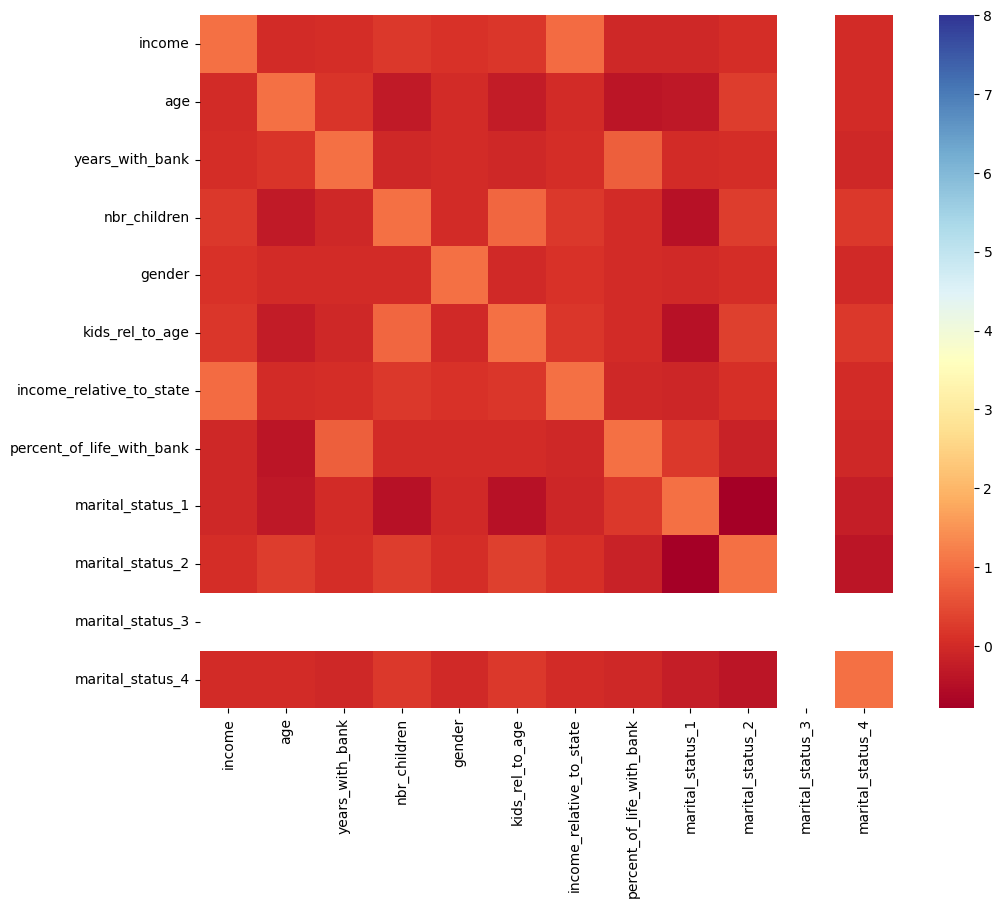

In [25]:
# make a correlation matrix to get a better idea of which data correlates
correlation_matrix = cust_df.corr()
f, ax = plt.subplots (figsize = (12, 9) )
sns.heatmap (correlation_matrix, vmax=8, square=True, cmap="RdYlBu")

In [26]:
# create clusters

# 1: initialize a list to store the within-cluster sum of squares (inertia)
inertia = []

# 2: loop over range of possible numbers of clusters (after, use elbow plot to see how many clusters are good)

for i in range (2, 15):
    km = KMeans(n_clusters = i, 
                init = "k-means++", 
                random_state = 0)
    km.fit(df_scaled)

    # 3: append the cluster_list for the current number of clusters
    inertia.append(km.inertia_)

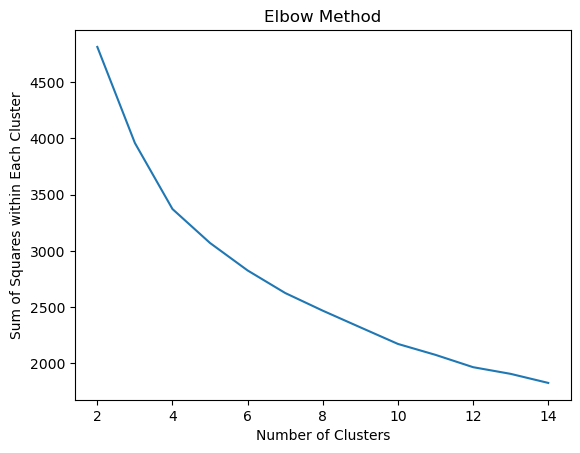

In [27]:
# make elbow plot

plt.plot(range(2, 15), inertia)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squares within Each Cluster")
plt.show()

In [28]:
# This suggests I should have 8-10 clusters!!

In [29]:
# silhouette score measures how similar an object is to its own cluster v others
# Range -1 to 1
# High = object is well-matched to its own cluster
# 0 = on the boundary between 2+ clusters
# -1: in the wrong cluster

# 1: import package
from sklearn.metrics import silhouette_score

# 2: initialize a list to store silhouette scores for each number of clusters (k)
silhouette_scores = []

# define range of k values
k_values = range(2, 11)

# 3: iterate over k values and compute silhouette scores
for i in k_values:
    model = KMeans(n_clusters=i, random_state=0, n_init=10)
    model.fit(df_scaled)

    # 4: Compute silhouette score
    labels = model.labels_
    score = silhouette_score (df_scaled, labels)
    silhouette_scores.append(score)

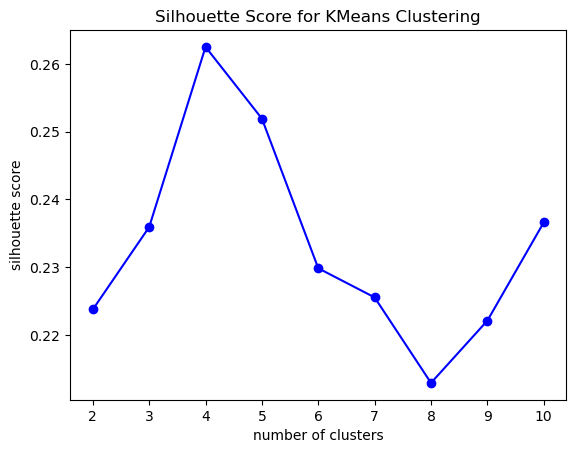

In [30]:
# plot silhouette score

plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel("number of clusters")
plt.ylabel("silhouette score")
plt.title("Silhouette Score for KMeans Clustering")
plt.show()

In [31]:
# apparently both the elbow curve and the silhouette score can be useful in determining the number of clusters
# apparently the silhouette score is more robust and provides a better measure of the quality of the clustering.

# looks like I should use 4. 4 is also better than 8-10!

In [32]:
# Apply clustering algorithm with the optimal number of clusters (4)

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_scaled)

# Assign cluster labels to the original dataframe
cust_df["cluster"] = kmeans.labels_

# Get the cluster labels
labels = cust_df["cluster"]

In [33]:
cust_df.groupby("cluster") .sum()
# this looks like it's mostly/entirely clustering based on marital status
# checking df_scaled confirms marital status values are high, which is skewing the results
# marital status probably isn't a bank's top priority (they're not a dating site!)
# I could remove these columns entirely, or i could divide the results to make them less relevant


,income,age,years_with_bank,nbr_children,gender,kids_rel_to_age,income_relative_to_state,percent_of_life_with_bank,marital_status_1,marital_status_2,marital_status_3,marital_status_4
cluster,,,,,,,,,,,,
0,1339160,2769,204,76,24,64.808978,51.442344,4.818864,0,0,0,59
1,2693846,9545,622,8,70,8.777335,109.677164,10.708332,0,156,0,0
2,3553708,6544,678,0,69,0.000000,133.838306,19.917732,170,0,0,0
3,4755715,6958,692,286,75,256.396091,180.067777,17.124697,0,167,0,0


In [35]:
df_scaled.head(4)

,income,age,years_with_bank,nbr_children,gender,kids_rel_to_age,income_relative_to_state,percent_of_life_with_bank,marital_status_1,marital_status_2,marital_status_3,marital_status_4
0,0.238244,-0.043746,0.382160,0.347129,1.14862,0.336067,0.795532,0.194278,-0.667103,0.842009,0.0,-0.345941
1,-0.990207,1.380073,-1.113956,-0.705701,1.14862,-0.714960,-1.059790,-1.171232,-0.667103,0.842009,0.0,-0.345941
2,-0.239560,-0.499369,1.504247,-0.705701,-0.87061,-0.714960,-0.306381,1.663987,1.499019,-1.187636,0.0,-0.345941
3,1.590702,0.411876,-0.365898,-0.705701,-0.87061,-0.714960,1.530618,-0.572686,1.499019,-1.187636,0.0,-0.345941


In [36]:
# dividing the scaled df, but I should probably be doing this to the original cust_df

cust_df2 = cust_df
df_scaled2 = df_scaled
df_scaled2["marital_status_1"] = df_scaled["marital_status_1"] / 4
df_scaled2["marital_status_2"] = df_scaled["marital_status_2"] / 4
df_scaled2["marital_status_3"] = df_scaled["marital_status_3"] / 4
df_scaled2["marital_status_4"] = df_scaled["marital_status_4"] / 4

df_scaled2.head(3)

,income,age,years_with_bank,nbr_children,gender,kids_rel_to_age,income_relative_to_state,percent_of_life_with_bank,marital_status_1,marital_status_2,marital_status_3,marital_status_4
0,0.238244,-0.043746,0.382160,0.347129,1.14862,0.336067,0.795532,0.194278,-0.166776,0.210502,0.0,-0.086485
1,-0.990207,1.380073,-1.113956,-0.705701,1.14862,-0.714960,-1.059790,-1.171232,-0.166776,0.210502,0.0,-0.086485
2,-0.239560,-0.499369,1.504247,-0.705701,-0.87061,-0.714960,-0.306381,1.663987,0.374755,-0.296909,0.0,-0.086485


In [37]:
# rerun silhouette score

silhouette_scores2 = []

# define range of k values
k_values2 = range(2, 11)

# 3: iterate over k values and compute silhouette scores
for i in k_values2:
    model = KMeans(n_clusters=i, random_state=0, n_init=10)
    model.fit(df_scaled)

    # 4: Compute silhouette score
    labels = model.labels_
    score = silhouette_score (df_scaled, labels)
    silhouette_scores2.append(score)

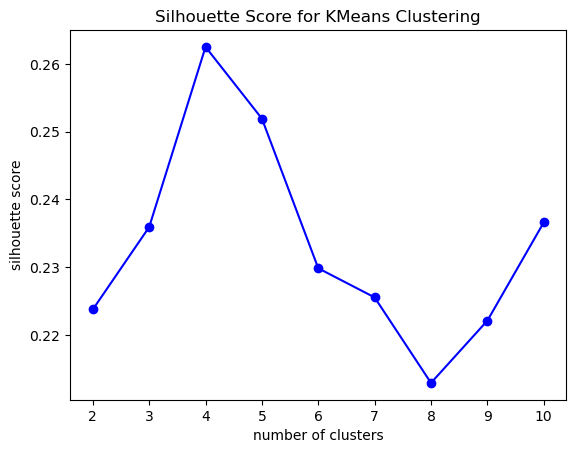

In [38]:
# plot silhouette score

plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel("number of clusters")
plt.ylabel("silhouette score")
plt.title("Silhouette Score for KMeans Clustering")
plt.show()

In [39]:
# silhouette score looks identical, let's check if the poeple are in the same clusters as before

# Apply clustering algorithm with the optimal number of clusters (4)

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_scaled2)

# Assign cluster labels to the original dataframe
df_scaled2["cluster"] = kmeans.labels_

# Get the cluster labels
labels = df_scaled2["cluster"]

In [40]:
differences = (df_scaled["cluster"] != df_scaled2["cluster"]).sum()
print(differences)

0


In [41]:
# ok, so nothing changed

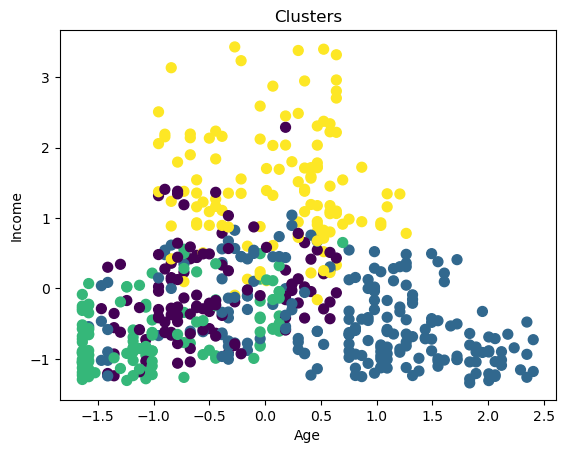

In [42]:
plt.scatter(df_scaled2["age"], df_scaled2["income"], c=df_scaled2["cluster"], s=50)
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [43]:
# create mean data per cluster
# "reset_index() creates "cluster" as a column rather than just having it as an index

mean_df = df_scaled2.groupby("cluster") .mean() .reset_index()
mean_df. drop(columns=["cluster"], inplace = True)
mean_df

,income,age,years_with_bank,nbr_children,gender,kids_rel_to_age,income_relative_to_state,percent_of_life_with_bank,marital_status_1,marital_status_2,marital_status_3,marital_status_4
0,-0.070117,-0.495441,-0.294961,1.481643,-0.174324,1.447620,-0.087898,-0.135398,-0.166776,0.114269,0.0,0.066974
1,-0.458021,0.757482,-0.265549,-0.649208,-0.053068,-0.648386,-0.449139,-0.623571,-0.000354,0.010013,0.0,-0.015438
2,-0.599177,-0.964483,0.500275,-0.502523,-0.091258,-0.492745,-0.592324,1.240976,0.208495,-0.167831,0.0,-0.043898
3,1.455846,0.103747,0.270271,0.158159,0.354735,0.180924,1.451236,0.017666,-0.037179,0.032691,0.0,0.003420


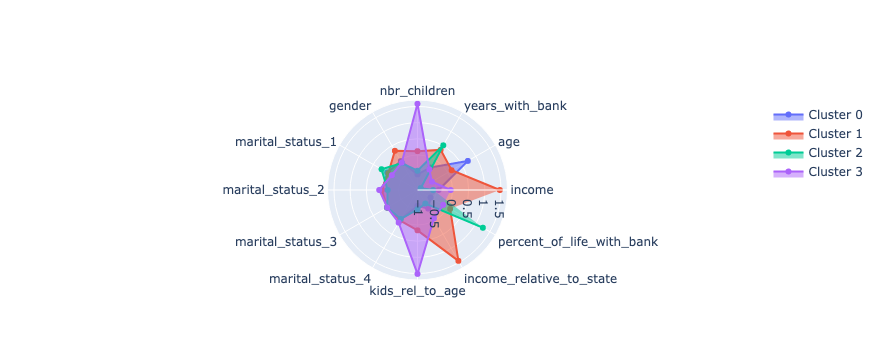

In [ ]:
#Radar plot

# 1: import plotly.graphobjects
import plotly.graph_objects as go

# 2: Plot features (columns) as theta (angle). Use the data grouped by the clusters
angle = mean_df.columns  

# 3: Initialize plot/figure
chart = go.Figure()

# Loop over each cluster in mean_df
for i in range(4):
    # Select column values in mean_df
    radius = mean_df.loc[i] .values

# Plot values
    chart .add_trace(go.Scatterpolar
        (r = radius,
        theta = angle,
        fill = "toself",
        name = f'Cluster {i}'
            )
        )
# Add labels etc
chart.update_layout(
    polar=dict (  radialaxis = dict (visible = True)  ),
    showlegend=True
        )

chart.show()

In [ ]:
# Perform PCA on the data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

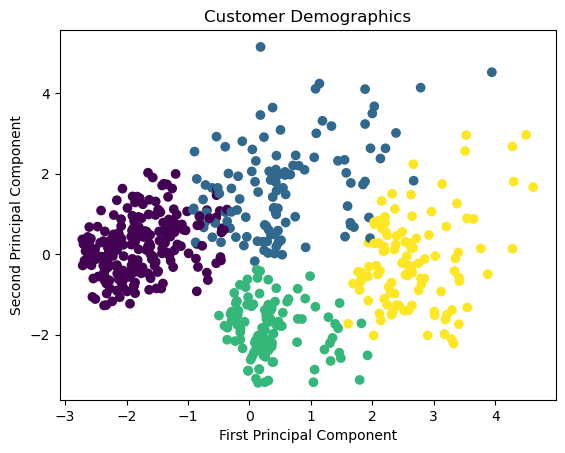

In [ ]:
# scatter plot
scatter_plot = plt.figure()
plt.scatter(principal_components[:,0], principal_components[:,1], c=labels)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("Customer Demographics")
plt.show()

In [ ]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Singular Values:", pca.singular_values_)
print("Principal Components:", pca.components_)

Explained Variance Ratio: [0.32846132 0.21894851]
Singular Values: [42.27125162 34.51230714]
Principal Components: [[ 1.79555248e-01 -3.32192645e-01  3.51691829e-02  4.85370480e-01
   4.41292070e-03 -3.19970705e-02  1.50639972e-02 -8.07793567e-28
   2.32559451e-02  4.74695074e-01  1.75170632e-01  1.74048662e-01
   5.76595556e-01]
 [ 5.50105012e-01  2.31779206e-01 -2.38530833e-01  1.10438148e-01
   1.19197257e-01 -4.20488162e-02  3.30084680e-02  0.00000000e+00
   9.79580434e-03  1.06468772e-01  5.52832502e-01 -4.22586379e-01
  -2.48735009e-01]]


In [ ]:
analysis_df = pd.DataFrame (data = pca.components_, columns = df_scaled2.columns)
analysis_df

,income,age,years_with_bank,nbr_children,gender,marital_status_1,marital_status_2,marital_status_3,marital_status_4,kids_rel_to_age,income_relative_to_state,percent_of_life_with_bank,cluster
0,0.179555,-0.332193,0.035169,0.485370,0.004413,-0.031997,0.015064,-8.077936e-28,0.023256,0.474695,0.175171,0.174049,0.576596
1,0.550105,0.231779,-0.238531,0.110438,0.119197,-0.042049,0.033008,0.000000e+00,0.009796,0.106469,0.552833,-0.422586,-0.248735


In [ ]:
# like the radar chart, this suggests that nbr_children is the most relevant component of the analysis, as is kids_rel_to_age

In [ ]:
# for some reason, all my marital_ststus_3s have been dropped.

orig_df = pd.read_csv("C:\\Users\\emily\\OneDrive\\Desktop\\Data Science Bootcamp\\wk5\\LHL Project 4 - Clustering\\Data\\twm_customer.csv")
orig_df.groupby("marital_status") .count()

# there were 48 in the original dataframe
# were these dropped as outliers, and if so, why?

,cust_id,income,age,years_with_bank,nbr_children,gender,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
marital_status,,,,,,,,,,,,,,
1,276,276,276,276,276,276,276,276,276,276,276,276,276,276
2,353,353,353,353,353,353,353,353,353,353,353,353,353,353
3,48,48,48,48,48,48,48,48,48,48,48,48,48,48
4,70,70,70,70,70,70,70,70,70,70,70,70,70,70


In [ ]:
# Plot individual explained variance
plt.bar(range(1,11), pca.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')

# Plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.step(range(1,11), cumulative_variance, where='mid', label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

NameError: name 'pca' is not defined

# Banking Behaviour

In [158]:
df = pd.read_csv('twm_checking_tran.csv', sep=';')
df.cust_id.nunique()

520

In [68]:
df2 = df.loc[:,['cust_id','tran_amt']]

In [27]:
df3 = df2[df.tran_amt<0]

In [48]:
df_checking = df4

In [52]:
df_checking.rename(columns={'tran_amt':'Wd_amt', 'count':'freq'}, inplace=True)

In [54]:
df_checking['Wd_amt'] = df_checking['Wd_amt']*-1

In [55]:
df_checking

,Wd_amt,freq
cust_id,,
1362480,102.566957,69.0
1362484,71.081667,72.0
1362485,77.378060,67.0
1362486,112.306667,9.0
1362487,72.242500,32.0
...,...,...
1363483,31.745556,72.0
1363484,93.338333,54.0
1363492,184.426528,72.0


In [157]:
df_dp = df2[df2.tran_amt>0]

In [61]:
df_dp2 = df_dp.groupby('cust_id').mean('tran_amt')

In [63]:
df_dp2['count'] = df_dp.groupby('cust_id').count()

In [69]:
df_dp2.rename(columns={'tran_amt':'Dp_amt', 'count':'freq'}, inplace=True)

In [70]:
df_dp2

,Dp_amt,freq
cust_id,,
1362480,488.009286,14
1362484,162.483750,16
1362485,313.752500,16
1362486,5.433846,13
1362487,66.647857,14
...,...,...
1363483,195.753077,13
1363484,167.022500,16
1363492,2005.706667,6


In [71]:
df_tran_final = df_checking.merge(df_dp2, how = 'inner', on='cust_id')

In [74]:
df_tran_final.to_csv('df_tran_final.csv')

In [79]:
df_sv = pd.read_csv('twm_savings_tran.csv', sep = ';')

In [109]:
df_sv[df_sv.tran_amt >0]

,cust_id,tran_amt
0,1363481,136.03
1,1362746,2.83
2,1363251,13.56
3,1362542,0.76
4,1363387,148.69
...,...,...
11184,1362950,1.68
11185,1362721,0.02
11186,1362806,3.60
11187,1362995,541.91


In [110]:
df_sv_DP = df_sv[df_sv.tran_amt>0]

In [111]:
df_sv_DP2 = df_sv_DP.groupby('cust_id').mean('tran_amt')

In [113]:
df_sv_DP2['count'] = df_sv_DP.groupby('cust_id').count()

In [118]:
df_sv_DP2.rename(columns={'tran_amt':'SV_DP','count':'freq'}, inplace=True)

In [159]:
df_saving_tran = df_sv_DP2
df_saving_tran

,SV_DP,freq
cust_id,,
1362480,106.397778,18
1362484,102.035517,29
1362486,37.737500,16
1362487,15.542500,8
1362489,58.390667,15
...,...,...
1363490,2.853333,12
1363491,152.435000,8
1363492,184.958235,17


In [121]:
df_saving_tran.to_csv('df_saving_tran.csv')

In [125]:
df_cd = pd.read_csv('twm_credit_tran.csv', sep=';')

In [128]:
df_cd = df_cd.loc[:,['cust_id','tran_amt']]

In [132]:
df_cd2 = df_cd[df_cd.tran_amt<0]

In [135]:
df_cd3 = df_cd2.groupby('cust_id').mean('tran_amt')

In [138]:
df_cd3['freq'] = df_cd2.groupby('cust_id').count()

In [139]:
df_cd3

,tran_amt,freq
cust_id,,
1362480,-191.321176,17
1362484,-116.890513,39
1362485,-117.459474,57
1362487,-121.323077,26
1362489,-244.068400,25
...,...,...
1363482,-107.228780,41
1363483,-120.489273,55
1363484,-123.047308,26


In [140]:
df_cd4 = df_cd[df_cd.tran_amt>0]

In [143]:
df_cd5 = df_cd4.groupby('cust_id').mean('tran_amt')

In [145]:
df_cd5['freq'] = df_cd4.groupby('cust_id').count()

In [147]:
df_credit_tran=df_cd3.merge(df_cd5,how='inner',on='cust_id')

In [150]:
df_credit_tran.rename(columns = {'tran_amt_x' : 'CD_amt', 'tran_amt_y' : 'PM_amt'},inplace=True)

In [152]:
df_credit_tran['CD_amt'] = df_credit_tran['CD_amt'] * -1

In [154]:
df_credit_tran.to_csv('df_credit_tran.csv')

In [3]:
df1 = pd.read_csv('df_checking_tran.csv')

In [5]:
df2 = pd.read_csv('df_credit_tran.csv')

In [102]:
df3 = pd.read_csv('df_saving_tran.csv')
df1

,cust_id,Wd_amt,freq_x,Dp_amt,freq_y
0,1362480,102.566957,69.0,488.009286,14
1,1362484,71.081667,72.0,162.483750,16
2,1362485,77.378060,67.0,313.752500,16
3,1362486,112.306667,9.0,5.433846,13
4,1362487,72.242500,32.0,66.647857,14
...,...,...,...,...,...
509,1363483,31.745556,72.0,195.753077,13
510,1363484,93.338333,54.0,167.022500,16
511,1363492,184.426528,72.0,2005.706667,6
512,1363493,143.906615,65.0,278.104737,19


In [89]:
df4 = pd.merge(pd.merge(df1,df2, how='left', on='cust_id'),df3, how='left', on='cust_id')
df4.isnull().sum()

cust_id       0
Wd_amt        0
freq_x_x      0
Dp_amt        0
freq_y_x      0
CD_amt      165
freq_x_y    165
PM_amt      165
freq_y_y    165
SV_DP       204
freq        204
dtype: int64

In [90]:
df4.fillna(0, inplace=True)

In [91]:
df4.isnull().sum()

cust_id     0
Wd_amt      0
freq_x_x    0
Dp_amt      0
freq_y_x    0
CD_amt      0
freq_x_y    0
PM_amt      0
freq_y_y    0
SV_DP       0
freq        0
dtype: int64

array([[<AxesSubplot:title={'center':'cust_id'}>,
        <AxesSubplot:title={'center':'Wd_amt'}>,
        <AxesSubplot:title={'center':'freq_x_x'}>],
       [<AxesSubplot:title={'center':'Dp_amt'}>,
        <AxesSubplot:title={'center':'freq_y_x'}>,
        <AxesSubplot:title={'center':'CD_amt'}>],
       [<AxesSubplot:title={'center':'freq_x_y'}>,
        <AxesSubplot:title={'center':'PM_amt'}>,
        <AxesSubplot:title={'center':'freq_y_y'}>],
       [<AxesSubplot:title={'center':'SV_DP'}>,
        <AxesSubplot:title={'center':'freq'}>, <AxesSubplot:>]],
      dtype=object)

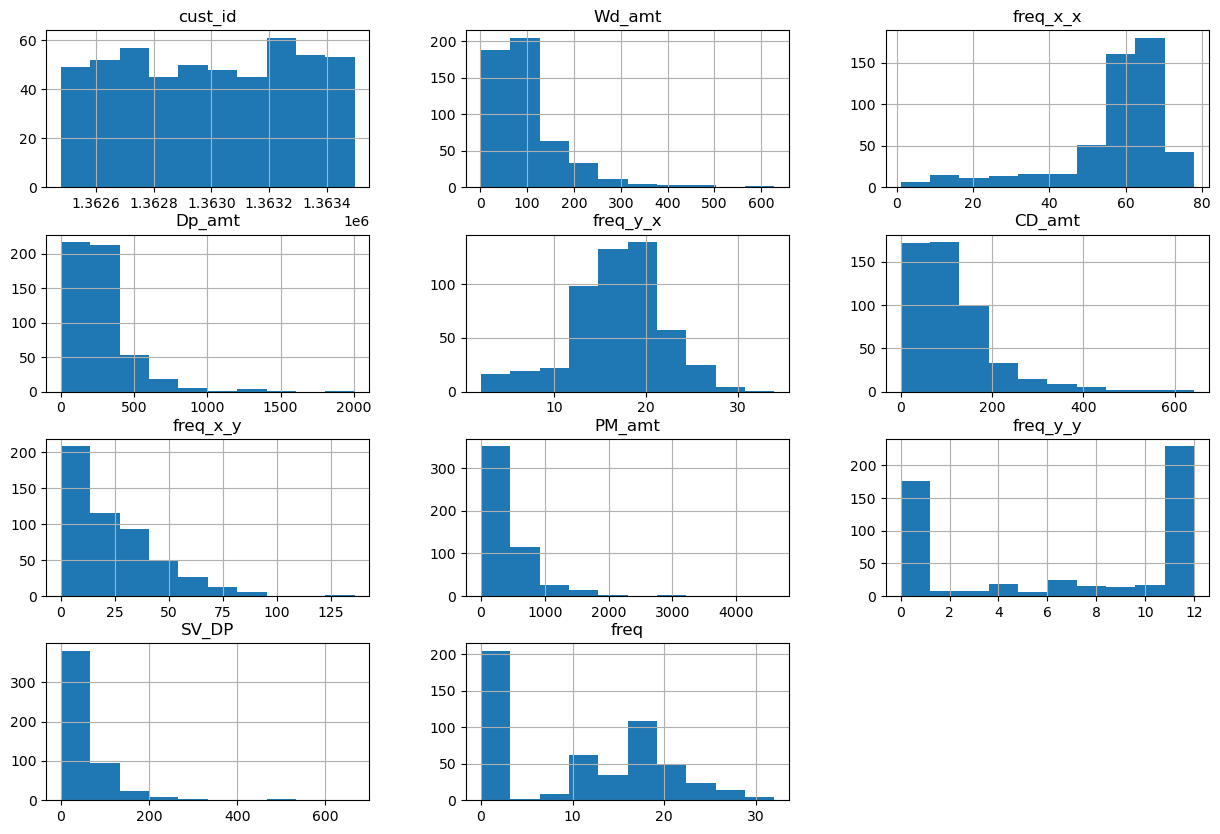

In [92]:
df4.hist(figsize = (15,10))

In [95]:
df4['CD_amt'] = df4['CD_amt'] +1

In [96]:
df4['freq_x_y'] = df4['freq_x_y'] + 1

In [97]:
df4['PM_amt'] = df4['PM_amt'] +1

In [98]:
df4['freq_y_y'] = df4['freq_y_y'] + 1

In [99]:
df4['SV_DP'] = df4['SV_DP'] + 1

In [100]:
df4['freq'] = df4['freq'] + 1

In [103]:
df4

,cust_id,Wd_amt,freq_x_x,Dp_amt,freq_y_x,CD_amt,freq_x_y,PM_amt,freq_y_y,SV_DP,freq
0,1362480,102.566957,69.0,488.009286,14,192.321176,18.0,434.426667,13.0,107.397778,19.0
1,1362484,71.081667,72.0,162.483750,16,117.890513,40.0,457.883333,13.0,103.035517,30.0
2,1362485,77.378060,67.0,313.752500,16,118.459474,58.0,495.496667,13.0,1.000000,1.0
3,1362486,112.306667,9.0,5.433846,13,1.000000,1.0,1.000000,1.0,38.737500,17.0
4,1362487,72.242500,32.0,66.647857,14,122.323077,27.0,405.702500,5.0,16.542500,9.0
...,...,...,...,...,...,...,...,...,...,...,...
509,1363483,31.745556,72.0,195.753077,13,121.489273,56.0,555.390833,13.0,1.000000,1.0
510,1363484,93.338333,54.0,167.022500,16,124.047308,27.0,334.670000,12.0,1.000000,1.0
511,1363492,184.426528,72.0,2005.706667,6,643.432000,16.0,655.945000,13.0,185.958235,18.0
512,1363493,143.906615,65.0,278.104737,19,1.000000,1.0,1.000000,1.0,92.095455,12.0


In [104]:
df4.Wd_amt = np.log(df4.Wd_amt)

In [105]:
df4.freq_x_x = np.log(df4.freq_x_x)

In [106]:
df4.Dp_amt = np.log(df4.Dp_amt)

In [107]:
df4.CD_amt = np.log(df4.CD_amt)

In [108]:
df4.PM_amt = np.log(df4.PM_amt)

In [109]:
df4.freq_y_y = np.log(df4.freq_y_y)

In [110]:
df4.SV_DP = np.log(df4.SV_DP)

array([[<AxesSubplot:title={'center':'cust_id'}>,
        <AxesSubplot:title={'center':'Wd_amt'}>,
        <AxesSubplot:title={'center':'freq_x_x'}>],
       [<AxesSubplot:title={'center':'Dp_amt'}>,
        <AxesSubplot:title={'center':'freq_y_x'}>,
        <AxesSubplot:title={'center':'CD_amt'}>],
       [<AxesSubplot:title={'center':'freq_x_y'}>,
        <AxesSubplot:title={'center':'PM_amt'}>,
        <AxesSubplot:title={'center':'freq_y_y'}>],
       [<AxesSubplot:title={'center':'SV_DP'}>,
        <AxesSubplot:title={'center':'freq'}>, <AxesSubplot:>]],
      dtype=object)

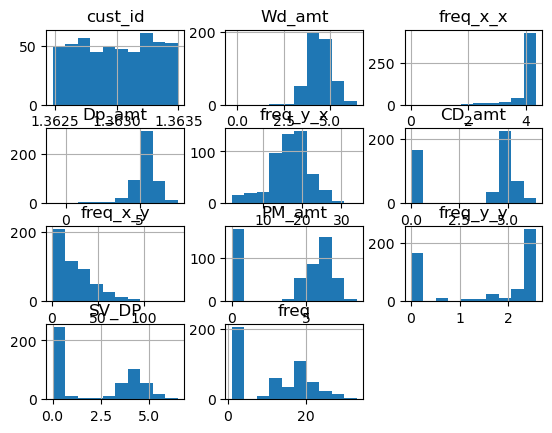

In [111]:
df4.hist()

In [26]:
df_acc = pd.read_csv('twm_checking_acct.csv', sep=';')

In [27]:
df_acc

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.00,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.00,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.00,Y,19.3.1994,NaN,2694.91,147.15
3,1362752,13627522,100,0.15,Y,8.1.1994,NaN,487.69,3.76
4,1363282,13632822,100,0.15,Y,5.3.1988,NaN,133.90,84.18
...,...,...,...,...,...,...,...,...,...
515,1363467,13634672,3000,0.00,Y,15.1.1995,NaN,4155.98,58.47
516,1362855,13628552,200,0.15,Y,2.9.1994,NaN,202.30,1070.87
517,1363324,13633242,3000,0.00,Y,25.8.1994,NaN,4010.41,2325.37
518,1362569,13625692,200,0.15,Y,6.4.1995,NaN,927.07,46.48


In [30]:
df_cred = pd.read_csv('twm_credit_acct.csv', sep=';')

In [31]:
df_cred

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00
...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00


In [32]:
df_m = pd.read_csv('df_tomerge.csv')

In [233]:
df_final = df4.merge(df_m, how='inner', on='cust_id')
df_final

,cust_id,Wd_amt,freq_x_x,Dp_amt,freq_y_x,CD_amt,freq_x_y,PM_amt,freq_y_y,SV_DP,freq,Unnamed: 0,credit_used,per_check_fee,starting_balance,total_savings,new_balance,total_dues
0,1362480,4.630516,4.234107,6.190334,14,5.259167,18.0,6.074027,2.564949,4.676539,19.0,0,0.80,1.6500,3650.35,14023.1300,-21692.35,-7669.22
1,1362485,4.348703,4.204693,5.748604,16,4.774571,58.0,6.205561,2.564949,0.000000,1.0,2,100.00,9.3000,13006.36,0.0001,-39235.62,-39235.62
2,1362487,4.280029,3.465736,4.199423,14,4.806666,27.0,6.005620,1.609438,2.805933,9.0,3,51.61,0.0001,77869.96,39594.8000,-22053.84,17540.96
3,1362489,4.613809,4.204693,5.763401,19,5.501537,26.0,6.765281,2.302585,4.084137,16.0,4,0.71,3.9000,21668.40,12976.0800,-59942.68,-46966.60
4,1362492,5.484972,4.043051,5.951183,24,5.153148,26.0,6.371663,1.609438,0.000000,1.0,5,100.00,0.0001,127540.00,0.0001,-32210.48,-32210.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,1363449,4.171066,4.276666,5.911152,16,5.328324,37.0,6.559310,2.484907,0.000000,1.0,359,42.44,5.4000,11928.96,0.0001,-21372.11,-21372.11
240,1363458,4.081880,4.174387,5.877268,10,4.946053,27.0,5.564383,2.564949,3.728290,20.0,362,54.24,5.2500,9989.35,5710.6000,-18909.76,-13199.16
241,1363475,4.031034,4.248495,5.376198,17,4.885792,35.0,6.416258,2.564949,0.000000,1.0,369,19.65,6.6000,17772.04,0.0001,-28816.66,-28816.66
242,1363483,3.457753,4.276666,5.276854,13,4.799826,56.0,6.319672,2.564949,0.000000,1.0,370,100.00,7.6500,7376.64,0.0001,-27906.24,-27906.24


In [177]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
arr_scal = scaler.fit_transform(df_test.iloc[:,1:])

In [215]:
df_scaled = pd.DataFrame(arr_scal, columns = df_test.columns[1:])

In [216]:
df_scaled

,Wd_amt,freq_x_x,Dp_amt,freq_y_x,CD_amt,freq_x_y,PM_amt,freq_y_y,SV_DP,freq,checking_bal,saving_bal,cred_bal,in_debt,save/inc,percent_of_credit_used,credit_used
0,0.345461,0.982010,1.569009,-0.845053,0.794199,-0.334676,0.666143,0.842647,1.118046,0.769899,-0.317594,1.000560,-0.514311,-1.114968,0.719802,0.725647,-0.369422
1,-0.312406,1.346628,-0.794900,-0.389330,0.580202,0.661750,0.684708,0.842647,1.098866,1.913119,-0.267163,1.175318,0.376711,0.570571,1.210093,0.166637,0.318829
2,-0.160135,0.730015,0.619518,-0.389330,0.582307,1.477008,0.712580,0.842647,-1.045092,-1.100825,-0.666767,-1.133590,0.714546,0.973654,-1.028289,0.721690,0.847951
3,0.178751,-0.654803,-2.560218,-0.161468,-1.505393,-1.104642,-1.478270,-1.435601,-1.045092,-1.100825,-0.131161,-1.133590,-1.459210,-1.114968,-1.028289,-1.592630,-1.480239
4,0.315488,0.730015,0.651322,0.294255,0.900176,0.027661,0.910187,0.609609,0.844030,0.458112,-0.117942,0.652491,-0.514311,-1.114968,0.470094,0.725203,-0.399195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,-1.492119,1.696360,-0.360372,-1.072914,-1.505393,-1.104642,-1.478270,-1.435601,0.951357,1.393473,-0.966085,1.091539,-1.459210,-1.114968,1.248942,-1.592630,-1.480239
425,-1.758577,1.346628,-0.394502,-1.072914,0.593350,1.386424,0.752867,0.842647,-1.045092,-1.100825,0.520371,-1.133590,0.684994,0.802814,-1.028289,0.721690,0.847951
426,0.176306,-1.118009,-0.735680,-0.389330,0.602461,0.072953,0.574039,0.771551,-1.045092,-1.100825,0.219920,-1.133590,0.407270,0.436277,-1.028289,0.655551,0.621438
427,0.953027,0.470382,0.360275,0.294255,-1.505393,-1.104642,-1.478270,-1.435601,1.046946,0.042395,1.411652,0.770721,-1.459210,-1.114968,0.465947,-1.592630,-1.480239


In [29]:
df_scaled = pd.read_csv('df_scaled.csv')
df_scaled

,Wd_amt,freq_x_x,Dp_amt,freq_y_x,CD_amt,freq_x_y,PM_amt,freq_y_y,SV_DP,freq,checking_bal,saving_bal,cred_bal,in_debt,save/inc,percent_of_credit_used,credit_used
0,0.345461,0.982010,1.569009,-0.845053,0.794199,-0.334676,0.666143,0.842647,1.118046,0.769899,-0.317594,1.000560,-0.514311,-1.114968,0.719802,0.725647,-0.369422
1,-0.312406,1.346628,-0.794900,-0.389330,0.580202,0.661750,0.684708,0.842647,1.098866,1.913119,-0.267163,1.175318,0.376711,0.570571,1.210093,0.166637,0.318829
2,-0.160135,0.730015,0.619518,-0.389330,0.582307,1.477008,0.712580,0.842647,-1.045092,-1.100825,-0.666767,-1.133590,0.714546,0.973654,-1.028289,0.721690,0.847951
3,0.178751,-0.654803,-2.560218,-0.161468,-1.505393,-1.104642,-1.478270,-1.435601,-1.045092,-1.100825,-0.131161,-1.133590,-1.459210,-1.114968,-1.028289,-1.592630,-1.480239
4,0.315488,0.730015,0.651322,0.294255,0.900176,0.027661,0.910187,0.609609,0.844030,0.458112,-0.117942,0.652491,-0.514311,-1.114968,0.470094,0.725203,-0.399195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,-1.492119,1.696360,-0.360372,-1.072914,-1.505393,-1.104642,-1.478270,-1.435601,0.951357,1.393473,-0.966085,1.091539,-1.459210,-1.114968,1.248942,-1.592630,-1.480239
425,-1.758577,1.346628,-0.394502,-1.072914,0.593350,1.386424,0.752867,0.842647,-1.045092,-1.100825,0.520371,-1.133590,0.684994,0.802814,-1.028289,0.721690,0.847951
426,0.176306,-1.118009,-0.735680,-0.389330,0.602461,0.072953,0.574039,0.771551,-1.045092,-1.100825,0.219920,-1.133590,0.407270,0.436277,-1.028289,0.655551,0.621438
427,0.953027,0.470382,0.360275,0.294255,-1.505393,-1.104642,-1.478270,-1.435601,1.046946,0.042395,1.411652,0.770721,-1.459210,-1.114968,0.465947,-1.592630,-1.480239


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
arr_red = pca.fit_transform(df_scaled)

Text(0, 0.5, '% Cumulative explained variance')

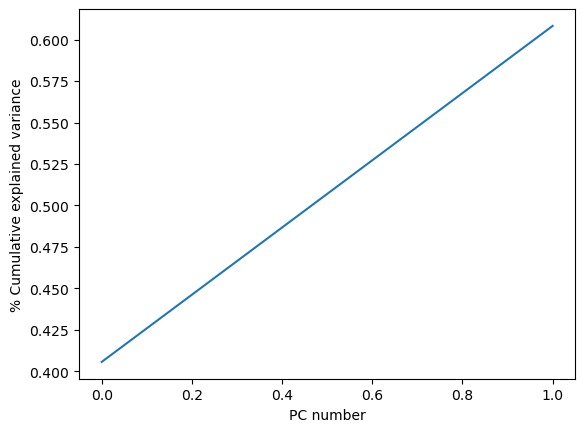

In [12]:
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_variance)
plt.xlabel('PC number')
plt.ylabel('% Cumulative explained variance')

In [13]:
pca_df = pd.DataFrame(data = arr_red)

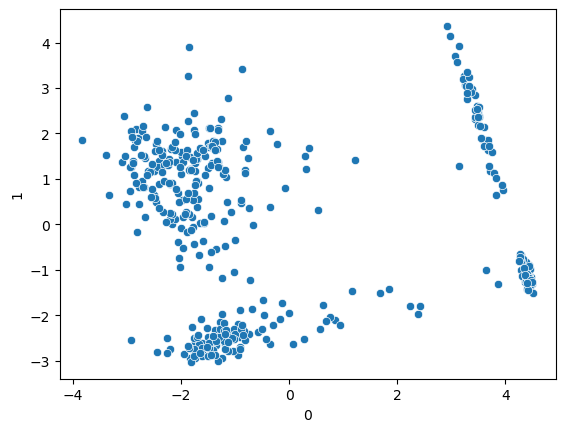

In [14]:
ax = sns.scatterplot(x=pca_df[0], y=pca_df[1],
data=pca_df,
legend=True)
plt.show()

In [15]:
from sklearn.cluster import KMeans

In [16]:
X = pca_df

In [17]:
X

,0,1
0,-0.857485,1.697965
1,-2.087474,2.075835
2,-1.784940,-2.772421
3,4.470555,-1.163595
4,-0.827633,1.194646
...,...,...
424,3.286783,2.885003
425,-1.652566,-2.837435
426,-0.857835,-2.439518
427,3.496864,2.353950


In [18]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

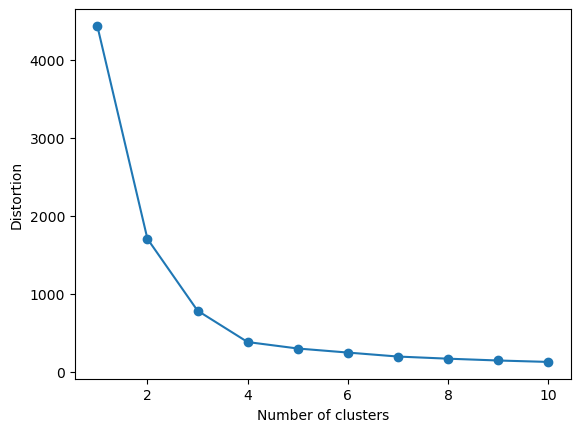

In [19]:
plot_distortion(X,10)

In [28]:
km = KMeans(n_clusters=3)
y_km = km.fit_predict(X)
y_km.shape

(429,)

In [21]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X.iloc[y_res == cluster,0]
        y = X.iloc[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()




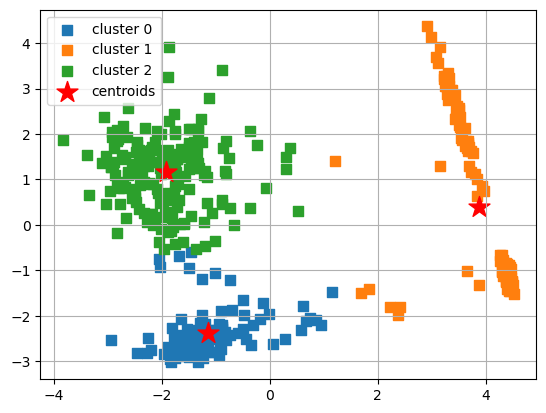

In [22]:
plot_clusters(X,y_km, plt_cluster_centers = True)

In [39]:
km.fit_predict(df_scaled)

array([1, 1, 0, 2, 1, 0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       2, 1, 1, 2, 0, 2, 1, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 2, 0,
       1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1,
       0, 1, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0,
       2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 0,
       1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 2,
       1, 0, 2, 0, 1, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0,
       0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 2,
       1, 1, 1, 2, 0, 2, 1, 1, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 0, 1, 2,
       2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 2, 2, 0,
       1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 1, 0, 2, 1, 0,

In [27]:
y_km_all.shape

(429,)

In [40]:
df_scaled['cluster'] = km.labels_

In [42]:
df_scaled.iloc[y_km_all == 0,0]

3      0.178751
6      0.109427
7     -0.378264
8     -1.202745
9     -0.955260
         ...   
418   -1.791340
423   -0.596375
424   -1.492119
427    0.953027
428    0.234302
Name: Wd_amt, Length: 125, dtype: float64

In [62]:
df_scaled.rename(columns = {'Wd_amt':'Withdrawal_amt', 'freq_x_x':'WD_freq', 'Dp_amt':'Deposit_amt', 'freq_y_x':'DP_freq', 'CD_amt':'Credit_amt', 'freq_x_y':'CD_freq', 'PM_amt':'Payment_amt', 'freq_y_y':'PM_freq', 'SV_DP':'Savings_Deposit', 'SV_DP_amt':'SV_DP_count', 'save/inc':'savings/income'},inplace=True)

In [63]:
df_scaled

,Withdrawal_amt,WD_freq,Deposit_amt,DP_freq,Credit_amt,CD_freq,Payment_amt,PM_freq,Savings_Deposit,SV_DP_count,checking_bal,saving_bal,cred_bal,in_debt,savings/income,percent_of_credit_used,credit_used,cluster
0,0.345461,0.982010,1.569009,-0.845053,0.794199,-0.334676,0.666143,0.842647,1.118046,0.769899,-0.317594,1.000560,-0.514311,-1.114968,0.719802,0.725647,-0.369422,1
1,-0.312406,1.346628,-0.794900,-0.389330,0.580202,0.661750,0.684708,0.842647,1.098866,1.913119,-0.267163,1.175318,0.376711,0.570571,1.210093,0.166637,0.318829,1
2,-0.160135,0.730015,0.619518,-0.389330,0.582307,1.477008,0.712580,0.842647,-1.045092,-1.100825,-0.666767,-1.133590,0.714546,0.973654,-1.028289,0.721690,0.847951,0
3,0.178751,-0.654803,-2.560218,-0.161468,-1.505393,-1.104642,-1.478270,-1.435601,-1.045092,-1.100825,-0.131161,-1.133590,-1.459210,-1.114968,-1.028289,-1.592630,-1.480239,2
4,0.315488,0.730015,0.651322,0.294255,0.900176,0.027661,0.910187,0.609609,0.844030,0.458112,-0.117942,0.652491,-0.514311,-1.114968,0.470094,0.725203,-0.399195,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,-1.492119,1.696360,-0.360372,-1.072914,-1.505393,-1.104642,-1.478270,-1.435601,0.951357,1.393473,-0.966085,1.091539,-1.459210,-1.114968,1.248942,-1.592630,-1.480239,2
425,-1.758577,1.346628,-0.394502,-1.072914,0.593350,1.386424,0.752867,0.842647,-1.045092,-1.100825,0.520371,-1.133590,0.684994,0.802814,-1.028289,0.721690,0.847951,0
426,0.176306,-1.118009,-0.735680,-0.389330,0.602461,0.072953,0.574039,0.771551,-1.045092,-1.100825,0.219920,-1.133590,0.407270,0.436277,-1.028289,0.655551,0.621438,0
427,0.953027,0.470382,0.360275,0.294255,-1.505393,-1.104642,-1.478270,-1.435601,1.046946,0.042395,1.411652,0.770721,-1.459210,-1.114968,0.465947,-1.592630,-1.480239,2


In [64]:
df_rad=df_scaled.groupby('cluster').mean()

In [65]:
df_scaled.cluster.value_counts()

1    189
2    126
0    114
Name: cluster, dtype: int64

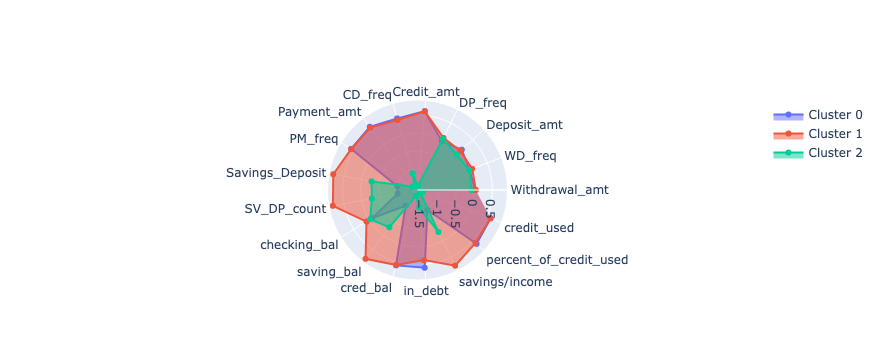

In [75]:
#Radar plot

# 1: import plotly.graphobjects
import plotly.graph_objects as go

# 2: Plot features (columns) as theta (angle). Use the data grouped by the clusters
angle = df_rad.columns  

# 3: Initialize plot/figure
chart = go.Figure()

# Loop over each cluster in mean_df
for i in range(3):
    # Select column values in mean_df
    radius = df_rad.loc[i] .values

# Plot values
    chart .add_trace(go.Scatterpolar
        (r = radius,
        theta = angle,
        fill = "toself",
        name = f'Cluster {i}'
            )
        )
# Add labels etc
chart.update_layout(
    polar=dict (  radialaxis = dict (visible = True)  ),
    showlegend=True
        )
chart.show()

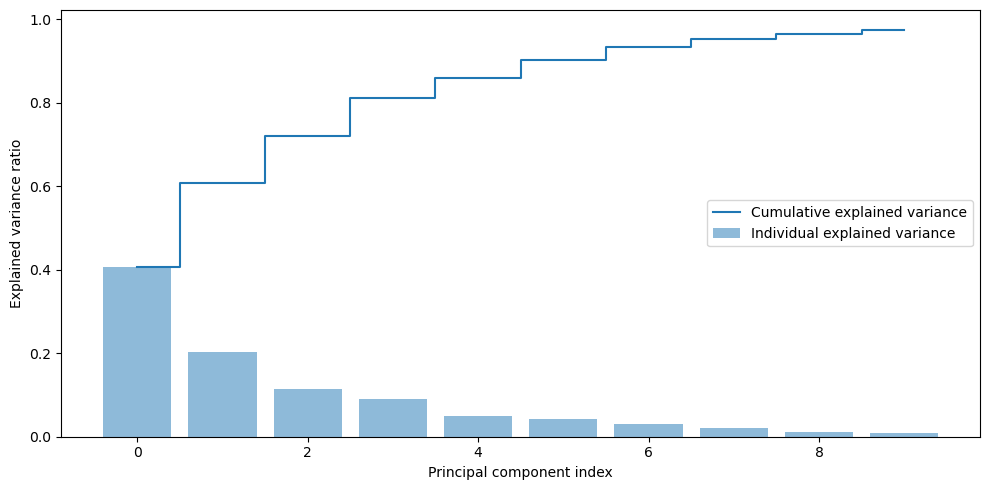

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
arr_red = pca.fit_transform(df_scaled)

# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
f, ax = plt.subplots(figsize=(10,5))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='center right')
plt.tight_layout()
plt.savefig('screeplot.png')
plt.show()


Text(0, 0.5, '% Cumulative explained variance')

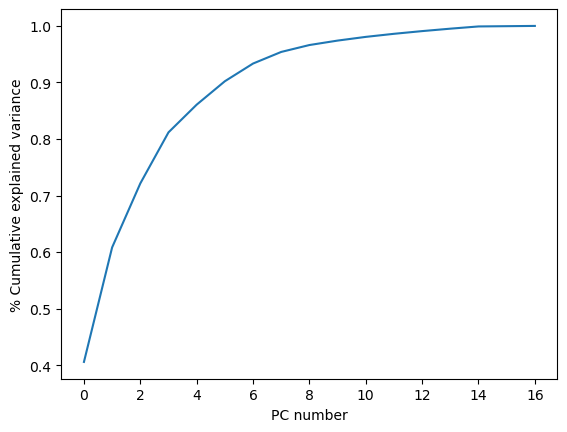

In [37]:
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_variance)
plt.xlabel('PC number')
plt.ylabel('% Cumulative explained variance')

In [38]:
pca_df = pd.DataFrame(data = arr_red)

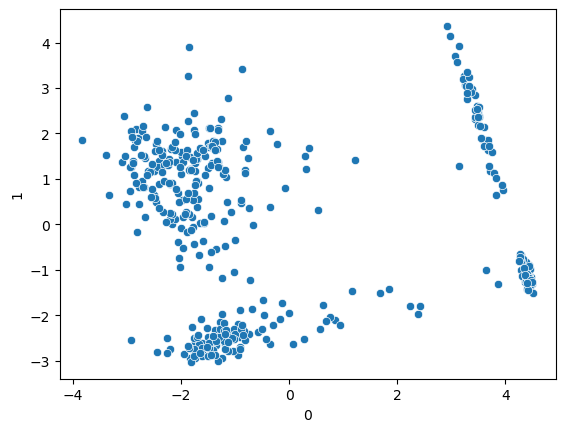

In [49]:
ax = sns.scatterplot(x=pca_df[0], y=pca_df[1],
data=pca_df,
legend=True)
plt.savefig('PCAscatter.png')
plt.show()


In [40]:
from sklearn.cluster import KMeans

In [41]:
X = pca_df

In [42]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.857485,1.697965,-0.500619,-2.058395,0.168780,0.573697,-1.155429,-1.270159,0.443051,-0.029645,-0.048966,0.029461,-0.218985,0.076227,0.349282,-0.028550,0.028231
1,-2.087474,2.075835,-1.515540,0.040215,-0.250667,-0.945582,-0.352437,-0.025737,0.013239,-0.371911,-0.412693,0.406121,0.272102,-0.611467,-0.226566,0.085161,0.046351
2,-1.784940,-2.772421,-0.404380,-0.765583,0.349211,-0.468867,-0.448065,0.513427,-0.164568,0.175399,0.095579,-0.240535,0.129688,0.123650,0.138853,-0.041636,-0.125586
3,4.470555,-1.163595,-0.028953,1.946400,-0.340716,-0.144624,-0.145048,0.158512,0.052721,-0.092467,-0.964681,1.068543,-0.167161,-0.128604,-0.300779,-0.014106,0.081749
4,-0.827633,1.194646,0.191914,-0.926464,-0.272691,-0.079734,-1.414587,-1.174784,0.360796,-0.010997,0.237522,0.089112,-0.429935,0.092836,0.267942,-0.016578,0.029166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,3.286783,2.885003,-2.946041,-0.485285,-0.039134,-0.742697,-0.084690,-0.181181,-0.180765,0.040301,0.097307,0.090153,0.074322,-0.192233,-0.132331,-0.004154,0.058038
425,-1.652566,-2.837435,-1.566883,-0.575315,-1.656129,-0.532004,0.064185,0.596658,-0.167702,-0.113485,-0.005269,0.004976,0.001155,0.145391,0.113253,0.001740,-0.075050
426,-0.857835,-2.439518,0.593349,0.817786,-0.276388,0.942003,0.136679,-0.121829,0.140278,-0.165917,-0.516661,0.288287,-0.071880,-0.122039,0.020736,0.036737,-0.097588
427,3.496864,2.353950,1.006443,-0.927415,-0.337998,-0.494305,0.327959,0.397853,0.039586,-0.352494,-0.531366,0.240153,-0.281054,0.515671,-0.014707,0.014288,-0.051134


In [45]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.savefig('distortion.png')
    plt.show() 
 

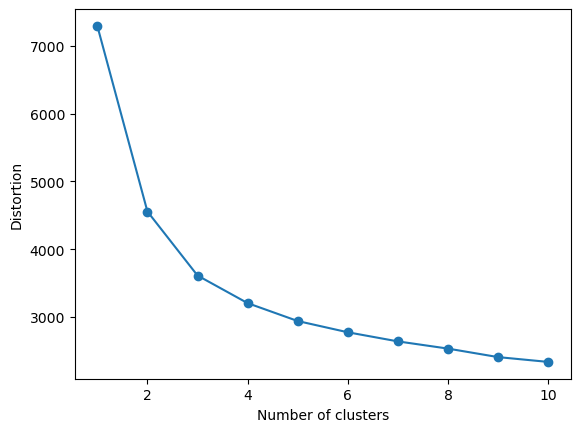

In [46]:
plot_distortion(X,10)

In [23]:
km = KMeans(n_clusters=3)
y_km = km.fit_predict(X)

In [50]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X.iloc[y_res == cluster,0]
        y = X.iloc[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.savefig('km_2clusters.png')
    plt.show()
  




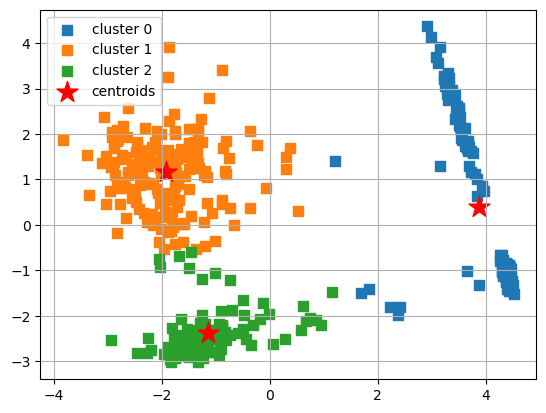

In [51]:
plot_clusters(X,y_km, plt_cluster_centers = True)